In [5]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,datetime,os,time,math

import torch
import pandas as pd
import seaborn as sns

from itertools import product

from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split

import pickle,h5py,json

import urllib
from bs4 import BeautifulSoup

sns.set()

In [13]:
os.listdir('./../../../../../')

['.DS_Store', 'Icon\r', 'Desktop', 'Documents', 'Downloads']

In [2]:
rootpath = '..\\..\\TF_data\\STOCKDATA\\Data\\DJIA\\'

In [3]:
df_dj = pd.read_csv(rootpath+'DJIA\\DJIA.csv',index_col='DATE',parse_dates=['DATE'])

df_dj['DJIA'] = df_dj['DJIA'].apply(lambda x: np.nan if x=='.' else float(x))
df_dj = df_dj.resample('MS').mean()

To request implementation, send an email to feature_requests@modin.org.


In [4]:
df = pd.read_csv(rootpath+'DJIA30\\all_stocks_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])

df = df[['Open']].reset_index(drop=False).groupby('Date').mean().rename(columns={'Open':'0_AVG'})
df = df.resample('MS').mean()

In [5]:
date_min = max(df.index.min(),df_dj.index.min())
date_max = min(df.index.max(),df_dj.index.max())

In [6]:
df_dj = df_dj[date_min:date_max]
df = df[date_min:date_max]

In [7]:
for filename in os.listdir(rootpath+'DJIA30\\'):
    if filename.split('_')[0]=='all': continue
    cf = pd.read_csv(rootpath+'DJIA30\\'+filename,index_col='Date',parse_dates=['Date'])
    cf = cf[['Open']].reset_index(drop=False).groupby('Date').mean().rename(columns={'Open':filename.split('_')[0]})
    df[filename.split('_')[0]] = cf.resample('MS').mean()[date_min:date_max]

In [8]:
df['0_DJIA'] = df_dj

In [9]:
df = df[df.columns.sort_values()]

In [13]:
df.shape

(94, 33)

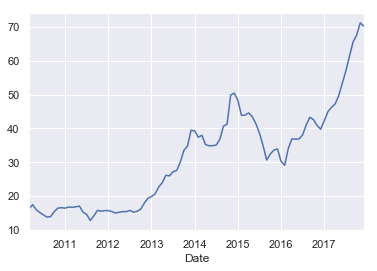

In [12]:
df['AABA'].plot()

In [41]:
class AUTOENCODER(torch.nn.Module):
    def __init__(self):
        super(AUTOENCODER,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(25,20),
            torch.nn.ReLU(True),
            torch.nn.Linear(20,15),
            torch.nn.ReLU(True),
            torch.nn.Linear(15,5),
            torch.nn.ReLU(True)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(5,15),
            torch.nn.ReLU(True),
            torch.nn.Linear(15,20),
            torch.nn.ReLU(True),
            torch.nn.Linear(20,25),
            torch.nn.ReLU(True)
        )
    def forward(self,x):
        y_enc = self.encoder(x)
        y_dec = self.decoder(y_enc)
        return y_dec,y_enc

In [47]:
batch_size = 5

In [118]:
aec = AUTOENCODER()
optimizer = torch.optim.Adam(aec.parameters(), lr=0.01)

criterion = torch.nn.MSELoss()

In [119]:
t = rnd.randint(0,8)
x = df.values[rnd.choice(np.arange(0,df.shape[1]),batch_size),t:t+25]
x_tensor = torch.FloatTensor(x)

x_h,_ = aec(x_tensor)

In [120]:
loss = criterion(x_h,x_tensor)

In [121]:
print(loss)

tensor(8878.9512, grad_fn=<MseLossBackward>)


In [122]:
optimizer.zero_grad()
loss.backward()
optimizer.step()